# **Setup Steps** - Required
1. Uncomment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to uncomment the whole cell)
2. Run the first code cell to uninstall the conflicting packages.
3. Run the second code cell to install the package dependencies. This might take several minutes.
4. Restart the notebook runtime before continuing. To do so, open the `Runtime` menu and click `Restart runtime` in the drop-down menu as shown in the image below. Once the notebook kernel restarts do not run the first two code cells again.
![google-colab-restart-notebook-runtime](https://github.com/cj-mills/christianjmills/raw/master/images/icevision-openvino-unity-tutorial/google-colab-restart-notebook-runtime.png)
5. Re-comment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to comment the whole cell).
6. Execute the notebook starting from the `from icevision.all import *` cell.
7. You will know everything is working if the `from icevision.all import *` cell has the following output.
```text
INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31
```
8. Make sure you have a Kaggle API key so you can download the dataset from Kaggle. ([steps](https://christianjmills.com/Fastai-to-Unity-Tutorial-1/#configure-kaggle-api))

**Uninstall conflicting packages**

In [1]:
# %%capture 
# !pip uninstall tensorflow -y
# !pip uninstall thinc -y
# !pip uninstall fastai -y
# !pip uninstall fastcore -y
# !pip uninstall spacy -y
# !pip uninstall en-core-web-sm -y
# !pip uninstall torchtext -y

**Install Dependencies**

In [2]:
# %%capture
# !pip install -U torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
# !pip install mmdet==2.17.0
# !pip install icevision==0.11.0
# !pip install icedata==0.5.1
# !pip install -U setuptools==59.5.0
# !pip install -U pillow
# !pip install -U numpy

# **Required:** Restart the notebook after installing dependencies and do not rerun the above code cells

**Import IceVision library**

In [3]:
from icevision.all import *

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [4]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Define path to dataset**

In [5]:
data_dir = icedata.pennfudan.load_data()
data_dir

  0%|          | 0/53723336 [00:00<?, ?B/s]

Path('/root/.icevision/data/PennFudanPed')

In [6]:
pd.DataFrame(list(data_dir.ls()))

,0
0,/root/.icevision/data/PennFudanPed/Annotation
1,/root/.icevision/data/PennFudanPed/added-object-list.txt
2,/root/.icevision/data/PennFudanPed/PedMasks
3,/root/.icevision/data/PennFudanPed/pennfundan.zip
4,/root/.icevision/data/PennFudanPed/readme.txt
5,/root/.icevision/data/PennFudanPed/PNGImages


In [7]:
img_dir = data_dir/'PNGImages'

**Get image file paths**

In [8]:
files = get_image_files(img_dir)
len(files)

170

**Inspect files**

In [9]:
pd.DataFrame([files[0], files[-1]])

,0
0,/root/.icevision/data/PennFudanPed/PNGImages/FudanPed00001.png
1,/root/.icevision/data/PennFudanPed/PNGImages/PennPed00096.png


**Inspect one of the training images**

Image Dims: (536, 559)


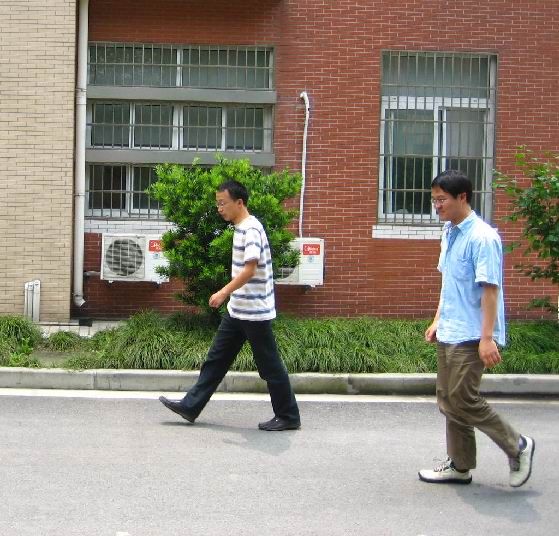

In [10]:
import PIL
img = PIL.Image.open(files[0]).convert('RGB')
print(f"Image Dims: {img.shape}")
img

**Create a dictionary that maps image names to file paths**

In [11]:
img_dict = {file.name.split('.')[0] : file for file in files}
list(img_dict.items())[0]

('FudanPed00001',
 Path('/root/.icevision/data/PennFudanPed/PNGImages/FudanPed00001.png'))

**Create a custom parser object**

In [12]:
parser = icedata.pennfudan.parser(data_dir)
len(parser)

170

**Parse annotations to create records**

In [13]:
train_records, valid_records = parser.parse()

  0%|          | 0/170 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/170 [00:00<?, ?it/s]

**Export class labels**

In [14]:
import json

class_labels = {"classes": parser.class_map.get_classes()}
class_labels_file_name = f"{data_dir.name}-classes.json"

with open(class_labels_file_name, "w") as write_file:
    json.dump(class_labels, write_file)
    
class_labels, class_labels_file_name

({'classes': ['background', 'person']}, 'PennFudanPed-classes.json')

**Inspect training records**

In [15]:
train_records[0]

BaseRecord

common: 
	- Record ID: 19
	- Image size [497, 442]
	- Filepath: /root/.icevision/data/PennFudanPed/PNGImages/FudanPed00019.png
	- Img: None
detection: 
	- masks: [<icevision.core.mask.MaskFile object at 0x7f325b968750>]
	- mask_array: None
	- BBoxes: [<BBox (xmin:7, ymin:135, xmax:142, ymax:389)>, <BBox (xmin:194, ymin:123, xmax:339, ymax:421)>]
	- Class Map: <ClassMap: {'background': 0, 'person': 1}>
	- Labels: [1, 1]

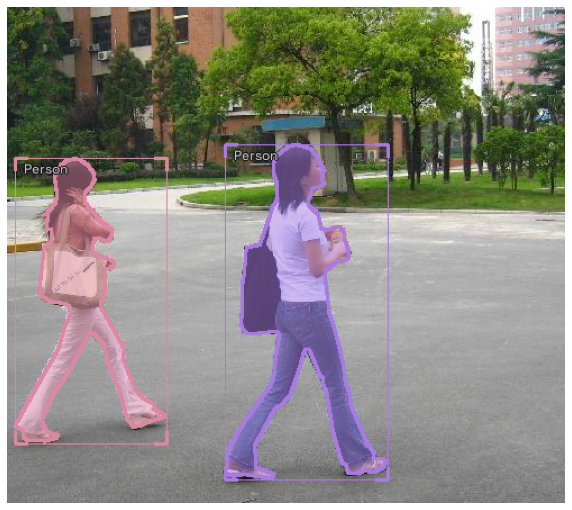

In [16]:
show_record(train_records[0], figsize = (10,10), display_label=True )

In [17]:
show_records(train_records[1:4], ncols=3,display_label=True)

Output hidden; open in https://colab.research.google.com to view.

**Define input resolution**

In [18]:
image_size = 512
presize = 1024

**Define Transforms**

In [19]:
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

**Get normalization stats**

In [20]:
mean = tfms.A.Normalize().mean
std = tfms.A.Normalize().std
mean, std

((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

**Define Datasets**

In [21]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)
train_ds, valid_ds

(<Dataset with 136 items>, <Dataset with 34 items>)

**Apply augmentations to a training sample**

In [22]:
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

Output hidden; open in https://colab.research.google.com to view.

**Define model type**

In [23]:
model_type = models.torchvision.mask_rcnn

**Define backbone**

In [24]:
backbone = model_type.backbones.resnet50_fpn()
pd.DataFrame.from_dict(backbone.__dict__, orient='index')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

0
backbone_fn                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

**Define batch size**

In [25]:
bs = 4

**Define DataLoaders**

In [26]:
train_dl = model_type.train_dl(train_ds, batch_size=bs, num_workers=2, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=bs, num_workers=2, shuffle=False)

In [27]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=8, shuffle=False)

In [28]:
valid_batch = first(valid_dl)
infer_batch = first(infer_dl)

In [29]:
(valid_images, valid_labels), valid_records = valid_batch

In [30]:
model_type.show_batch(first(valid_dl), ncols=4)

Output hidden; open in https://colab.research.google.com to view.

**Instantiate the model**

In [31]:
model = model_type.model(backbone=backbone, num_classes=icedata.pennfudan.NUM_CLASSES) 

**Define metrics**

In [32]:
metrics = [COCOMetric(metric_type=COCOMetricType.mask)]

**Define Learner object**

In [33]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

**Find learning rate**

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


SuggestedLRs(valley=7.585775892948732e-05)

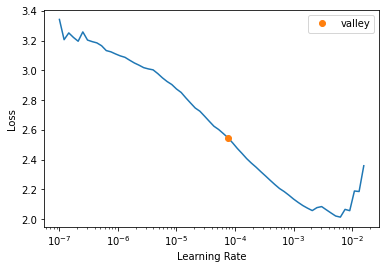

In [34]:
learn.lr_find()

**Define learning rate**

In [35]:
lr = 3e-4

**Define number of epochs**

In [36]:
epochs = 20

**Finetune model**

In [37]:
learn.fine_tune(epochs, lr, freeze_epochs=1)

epoch,train_loss,valid_loss,COCOMetric,time
0,1.630727,1.453027,0.000000,00:15


epoch,train_loss,valid_loss,COCOMetric,time
0,1.309725,1.220485,0.000000,00:30
1,1.120996,0.818762,0.000000,00:26
2,0.894177,0.693714,0.000000,00:26
3,0.749514,0.636240,0.000000,00:27
4,0.667681,0.557168,0.000000,00:29
5,0.606234,0.518407,0.000000,00:27
6,0.560516,0.507658,0.000000,00:27
7,0.531371,0.539762,0.000000,00:30
8,0.515155,0.498600,0.000000,00:27
9,0.498681,0.485995,0.000000,00:27


**Show results on validation set**

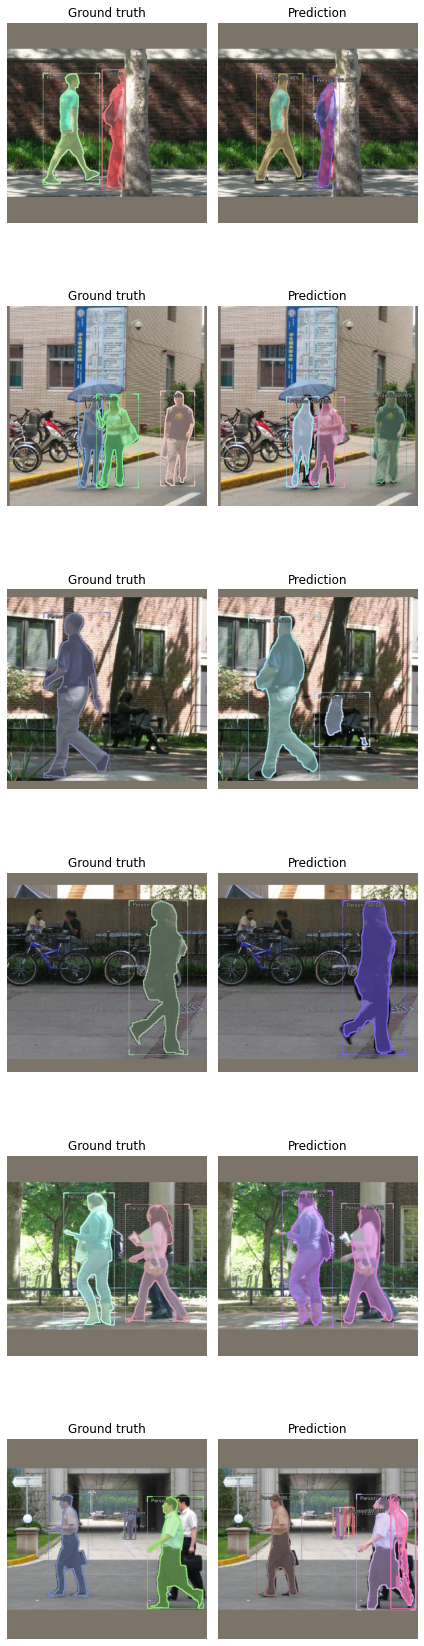

In [38]:
model_type.show_results(model, valid_ds, detection_threshold=.5)

**Define model checkpoint file path**

In [39]:
checkpoint_path = f"{data_dir.name}-{type(model).__name__}.pth"
checkpoint_path

'PennFudanPed-MaskRCNN.pth'

In [40]:
# checkpoint_path = 'PennFudanPed-MaskRCNN.pth'
# class_labels_file_name = 'PennFudanPed-classes.json'

**Save model checkpoint**

In [41]:
torch.save(model.state_dict(), checkpoint_path)

**Load class labels**

In [42]:
with open(class_labels_file_name, "r") as read_file:
    classes = json.loads(read_file.read())
classes['classes']

['background', 'person']

In [43]:
checkpoint_and_model = models.model_from_checkpoint(checkpoint_path, 
                                                    model_name='torchvision.mask_rcnn', 
                                                    backbone_name='resnet50_fpn',
                                                    img_size=512, 
                                                    classes=classes['classes'],
                                                   )

load checkpoint from local path: PennFudanPed-MaskRCNN.pth


**Verify class map**

In [44]:
checkpoint_and_model["class_map"]

<ClassMap: {'background': 0, 'person': 1}>

**Get model and device**

In [45]:
model = checkpoint_and_model["model"]

device=next(model.parameters()).device
device

device(type='cpu')

**Define inference preprocessing steps**

In [46]:
img_size = checkpoint_and_model["img_size"]
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

**Select a test image**

In [47]:
# test_img = open_img('/home/innom-dt/.icevision/data/PennFudanPed/PNGImages/FudanPed00001.png')
# test_img

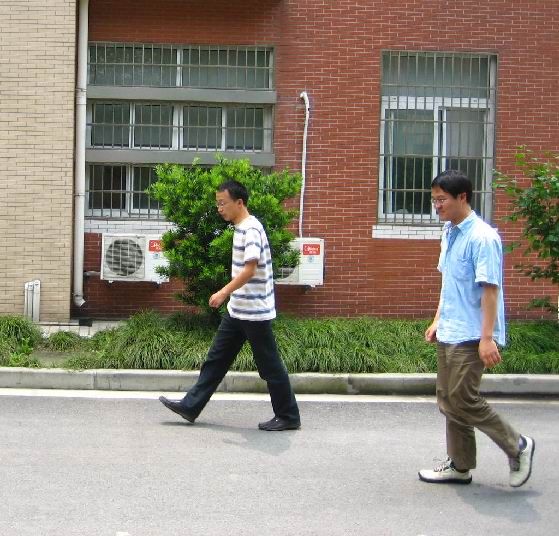

In [48]:
test_img = open_img(files[0])
test_img

**Define inference dataloader**

In [49]:
infer_tfms = tfms.A.Adapter([tfms.A.Normalize()])
infer_ds = Dataset.from_images([test_img], infer_tfms)
infer_dl = model_type.infer_dl(infer_ds, batch_size=1, shuffle=False)

**Perform inference**

In [50]:
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/1 [00:00<?, ?it/s]

**Inspect source image**

In [51]:
preds[0].ground_truth

BaseRecord

common: 
	- Record ID: 0
	- Image size ImgSize(width=559, height=536)
	- Img: 559x536x3 <np.ndarray> Image
detection: 
	- Class Map: None

**Inspect model prediction**

In [52]:
preds[0].pred

BaseRecord

common: 
	- Img: 559x536x3 <np.ndarray> Image
	- Image size ImgSize(width=559, height=536)
	- Record ID: 0
detection: 
	- BBoxes: [<BBox (xmin:402.29388427734375, ymin:168.3533477783203, xmax:533.0299682617188, ymax:483.1787109375)>, <BBox (xmin:171.72669982910156, ymin:176.08409118652344, xmax:311.71734619140625, ymax:437.27471923828125)>]
	- masks: []
	- mask_array: <icevision.core.mask.MaskArray object at 0x7f3257f85a50>
	- Class Map: None
	- Labels: [1, 1]
	- Scores: [0.99634784 0.9943387 ]

**Annotate image with model prediction**

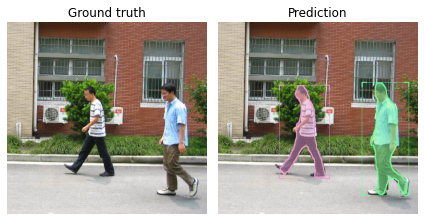

In [53]:
show_preds(preds=preds)